## Assignment 1
### Name: Bismay Parija
### Roll Number: 20CS30067

### Import the dependencies

In [27]:
# Import the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Data Preprocessing

In [28]:
# Load the dataset
df = pd.read_csv('../../dataset/linear-regression.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
# Split the dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.375, random_state=42)

In [30]:
# Separate features and target
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']
X_val = val_data.drop(columns=['quality'])
y_val = val_data['quality']
X_test = test_data.drop(columns=['quality'])
y_test = test_data['quality']

In [31]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Analytical Solution

In [32]:
# Add a bias term to the feature matrix
X_train_bias = np.column_stack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))

# Analytical solution for linear regression
theta_analytical = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

# Predict on test set
X_test_bias = np.column_stack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
y_pred_analytical = X_test_bias @ theta_analytical

In [33]:
# Calculate R-squared
y_mean = np.mean(y_test)
ss_tot = np.sum((y_test - y_mean)**2)   # Total sum of squares
ss_res = np.sum((y_test - y_pred_analytical)**2)    # Total sum of squares of residuals
r_squared_analytical = 1 - (ss_res / ss_tot)
print("R-squared =", r_squared_analytical)

# Calculate RMSE
rmse_analytical = np.sqrt(np.mean((y_test - y_pred_analytical)**2))
print("RMSE =", rmse_analytical)

R-squared = 0.4104741708990417
RMSE = 0.6206920199022871


### Gradient Descent

In [34]:
class GradientDescent :
    def __init__(self) :
        pass

    def forward_propagation(self, X, y, theta) :
        y_pred = X @ theta
        error = y_pred - y
        loss = np.mean(error ** 2)
        return y_pred, loss
    
    def backward_propagation(self, X, y, y_pred) :
        m = len(y)
        error = y_pred - y
        gradient = (X.T @ error) / m
        return gradient

    def update_weights(self, theta, gradient, learning_rate) :
        theta -= learning_rate * gradient
        return theta

    def train(self, X, y, theta, learning_rate, num_iterations) :
        losses = []
        iters = []
        for i in range(num_iterations):
            y_pred, loss = self.forward_propagation(X, y, theta)
            gradient = self.backward_propagation(X, y, y_pred)
            theta = self.update_weights(theta, gradient, learning_rate)
            losses.append(loss)
            iters.append(loss)
        return theta, losses, iters
    
    def plot_loss(self, losses, iters) :
        plt.plot(iters, losses)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Loss')
        plt.title('Plot Loss')
        plt.show()

For Learning Rate: 0.1


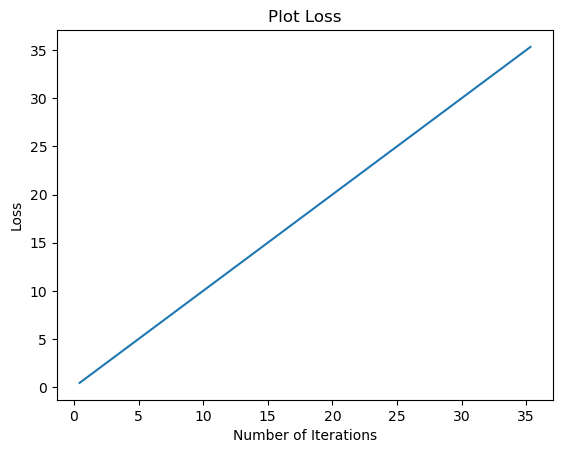

For Learning Rate: 0.001


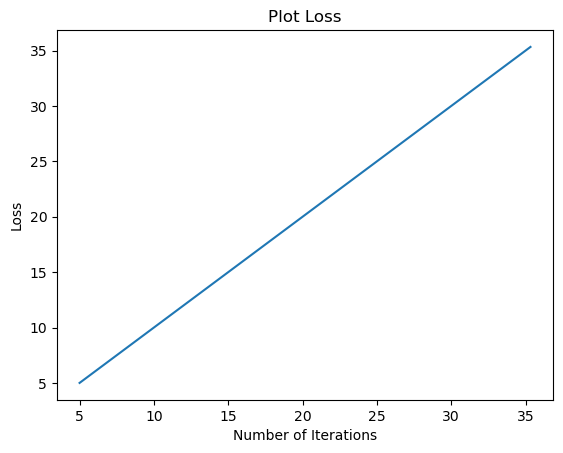

For Learning Rate: 0.0001


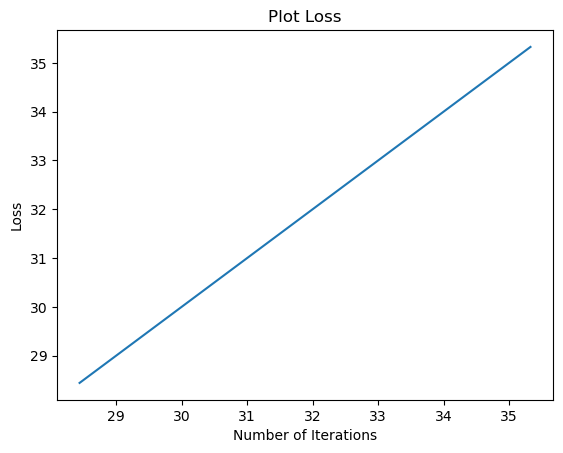

In [38]:
# Initialise theta for gradient descent
theta_gradient = np.random.rand(X_train_scaled.shape[1] + 1)

# Perform gradient descent with different learning rates
learning_rates = [0.1, 0.001, 0.0001]
num_iterations = 1000

for lr in learning_rates:
    print("For Learning Rate:", lr)
    # Declare an object of the class GradientDescent
    regressor = GradientDescent()
    # Add a bias term to the feature matrix
    X_train_bias = np.column_stack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
    X_val_bias = np.column_stack((np.ones((X_val_scaled.shape[0], 1)), X_val_scaled))
    X_test_bias = np.column_stack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    # Train the model
    theta_optimised, train_loss, iters = regressor.train(X_train_bias, y_train, theta_gradient.copy(), lr, num_iterations)
    # Plot the train loss
    regressor.plot_loss(train_loss, iters)

   